## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\bulle\Documents\Python Scripts\Achievement6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'movie_data_pythonclean.csv'), index_col = 0, encoding='ISO-8859-1')

In [5]:
df.shape

(3789, 19)

In [6]:
df.head()

,movie_title,duration,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,language,country,content_rating,num_critic_for_reviews,director_facebook_likes,budget,gross,genres,cast_total_facebook_likes,imdb_score,color,plot_keywords
3,9,112,1986,Adrian Lyne,David Margulies,Karen Young,Kim Chan,English,USA,R,38,213,17000000,6734844,Drama|Romance,711,5,Color,blindfolded woman|control|male dominance|sex g...
4,9,79,2009,Shane Acker,Martin Landau,Alan Oppenheimer,Tom Kane,English,USA,PG-13,263,30,30000000,31743332,Action|Adventure|Animation|Drama|Mystery|Sci-F...,1594,7,Color,hope|key|machine|number|rag doll
5,21,123,2008,Robert Luketic,Kevin Spacey,Jim Sturgess,Josh Gad,English,USA,PG-13,144,126,35000000,81159365,Crime|Drama|Thriller,25661,6,Color,based on true story|blackjack|card counting|ga...
6,42,128,2013,Brian Helgeland,Harrison Ford,Christopher Meloni,Nicole Beharie,English,USA,PG-13,216,241,40000000,95001343,Biography|Drama|Sport,16911,7,Color,baseball|baseball player|brooklyn dodgers|majo...
7,54,121,1998,Mark Christopher,Salma Hayek,Ellen Albertini Dow,Sela Ward,English,USA,R,63,15,13000000,16574731,Drama|Music,6910,5,Color,angel dust the drug|disco|new york city|quaalu...


In [7]:
df.isnull().sum()

movie_title                   0
duration                      0
title_year                    0
director_name                 0
actor_1_name                  3
actor_2_name                  5
actor_3_name                 10
language                      0
country                       0
content_rating               50
num_critic_for_reviews        0
director_facebook_likes       0
budget                        0
gross                         0
genres                        0
cast_total_facebook_likes     0
imdb_score                    0
color                         0
plot_keywords                29
dtype: int64

In [8]:
df=df[['duration','num_critic_for_reviews','gross','cast_total_facebook_likes','imdb_score']]

In [9]:
# Cleaning extreme value for outleirs for cast total facebook likes
df = df[df['cast_total_facebook_likes'] <=250000] 

### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.7884961530336879e+19,
 -6.611628641017755e+18,
 -3.3542117401916933e+18,
 -2.0363779220898117e+18,
 -1.3986095106720013e+18,
 -9.85944159660424e+17,
 -7.134141679295354e+17,
 -5.2166280964941984e+17,
 -4.118914309322718e+17]

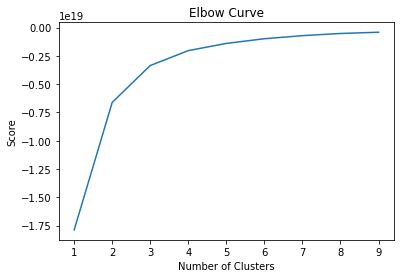

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  The graph shows a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

In [16]:
df.head()

,duration,num_critic_for_reviews,gross,cast_total_facebook_likes,imdb_score,clusters
3,112,38,6734844,711,5,0
4,79,263,31743332,1594,7,0
5,123,144,81159365,25661,6,1
6,128,216,95001343,16911,7,1
7,121,63,16574731,6910,5,0


In [17]:
df['clusters'].value_counts()

0    2894
1     756
2     136
Name: clusters, dtype: int64

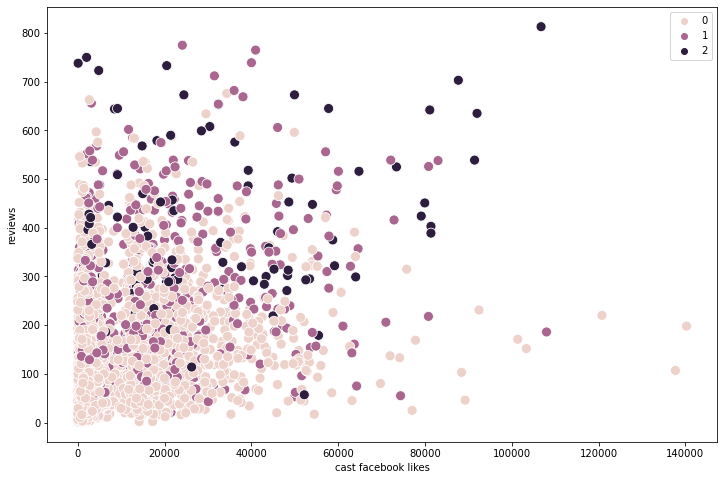

In [18]:
# Plot the clusters for the "cast_total_facebook_likes" and "num_critic_for_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['cast_total_facebook_likes'], y=df['num_critic_for_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('cast facebook likes') 
plt.ylabel('reviews')
plt.show()

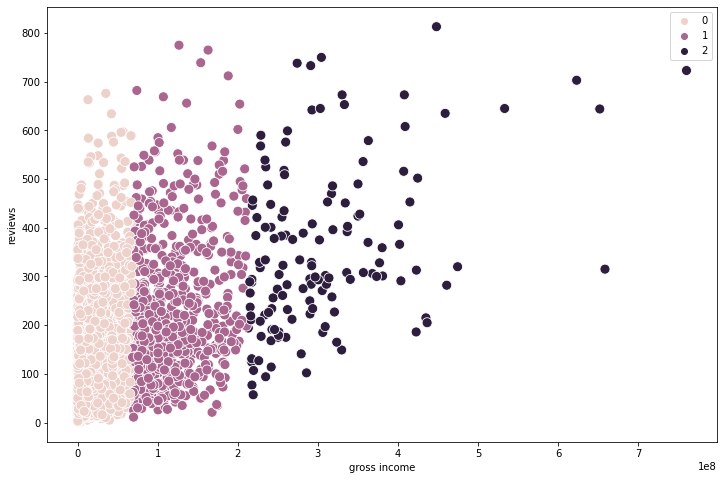

In [19]:
# Plot the clusters for the "gross" and "num_critic_for_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gross'], y=df['num_critic_for_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('gross income') 
plt.ylabel('reviews') 
plt.show()

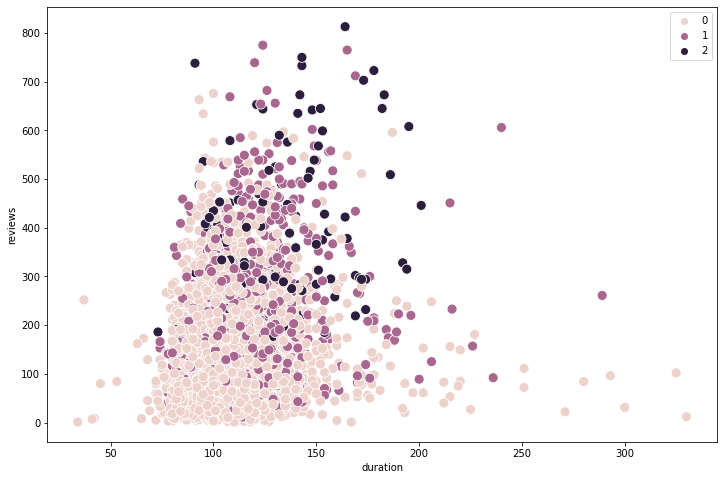

In [20]:
# Plot the clusters for the "imdb_score" and "num_critic_for_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['duration'], y=df['num_critic_for_reviews'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('duration') 
plt.ylabel('reviews') 
plt.show()

In the "gross income vs. reviews", the first cluster (in pink coded as '0'), the movies have 70k or less gross income. Second cluster (in dark purple coded as '2'), movies have between 70k to 200k gross income. The third cluster (in purple coded as '1'), the movies have over 200k gross income. The graph shows as movies make more money, more critic reviews will be made.

The other two graphs are all mixed up so there might be other factors to decide critic reviews.

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'cast_total_facebook_likes':['mean', 'median'], 
                         'num_critic_for_reviews':['mean', 'median'], 
                         'gross':['mean', 'median'],
                          'duration':['mean','median'],
                          'imdb_score':['mean','median']})

cast_total_facebook_likes          num_critic_for_reviews         \
                                 mean   median                   mean median   
cluster                                                                        
dark purple              24964.948529  16075.5             356.272059  316.5   
pink                      9071.438839   3145.0             136.687630  113.0   
purple                   14923.402116  12178.5             217.977513  182.0   

                    gross                 duration        imdb_score         
                     mean       median        mean median       mean median  
cluster                                                                      
dark purple  3.073847e+08  289950907.5  127.102941  125.5   6.882353    7.0  
pink         2.133370e+07   16186767.0  107.303732  103.0   5.906012    6.0  
purple       1.145002e+08  105354513.5  116.309524  113.0   6.255291    6.0

With the descriptive statistic, we can tell overall the second cluster (dark purple) has the highest in all catagories. We can say movies with a high 'cast total facebook likes' will have a high 'gross income' with a high number or 'critic reviews'. In this case, 'imdb score' are too close to make any sugguestion so the IMDB score maybe irrelevant.